## Описание проекта

Заказчик исследования - интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года, и мы планируем кампанию на 2017-й.

*В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*

### Ход выполнения проекта

<a href="#p1">Шаг 1. Открыть файл с данными и изучить общую информацию</a>

Путь к файлу: `/datasets/games.csv.`

<a href="#p2">Шаг 2. Подготовить данные</a>

1. Заменить названия столбцов (привести к нижнему регистру);
2. Преобразовать данные в нужные типы;
3. Обработать пропуски при необходимости:
4. Объяснить цель заполнения или незаполнения пропусков;
5. Описать причины, которые могли привести к пропускам;
6. Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.

<a href="#p3">Шаг 3. Провести исследовательский анализ данных</a>

1. Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
4. Не учитывать в работе данные за предыдущие годы.
5. Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
6. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
7. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
8. Соотнести выводы с продажами игр на других платформах.
9. Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<a href="#p4">Шаг 4. Составить портрет пользователя каждого региона</a>

Определить для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Описать различия в долях продаж.
2. Самые популярные жанры (топ-5). Пояснить разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<a href="#p5">Шаг 5. Провка гипотез</a>

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Пояснить:
- Как сформулированы нулевая и альтернативная гипотезы;
- Какой критерий применили для проверки гипотез и почему.

<a href="#p6">Шаг 6. Написать общий вывод</a>

### Описание данных

*Name* — название игры

*Platform* — платформа

*Year_of_Release* — год выпуска

*Genre* — жанр игры

*NA_sales* — продажи в Северной Америке (миллионы проданных копий)

*EU_sales* — продажи в Европе (миллионы проданных копий)

*JP_sales* — продажи в Японии (миллионы проданных копий)

*Other_sales* — продажи в других странах (миллионы проданных копий)

*Critic_Score* — оценка критиков (максимум 100)

*User_Score* — оценка пользователей (максимум 10)

*Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<a id="p1"></a>
### Получение данных

In [1]:
#Импорты

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#Создаём датафрейм
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Рассмотрим общую информацию о данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Рассмотрим диапазоны данных
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
#Ищем дубли
df.duplicated().value_counts()

False    16715
dtype: int64

In [6]:
#Ищем неявные дубликаты в рейтинге
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Рейтинг K-A, AO и E - примерно один и тот же рейтинг, но использовался в разные годы и может иметь разный "оттенок", принимаем решение не объединять.

ESRB определяет рейтинг ПО в США и Канаде с 1994 года. Игры, которые выпускались за пределами этих стран в ранние годы могут не иметь рейтинг ESRB, чем и объясняются пропуски. Заполним пропуски значением "WR" (without rating).  

Оценки критиков выглядят как целые числа, хотя тип данных - float, проверим это:

In [7]:
dfc = df.dropna()
dfc = dfc.loc[df['Critic_Score'] % 1 != 0]
print('Количество нецелых значений:', len(dfc))

Количество нецелых значений: 0


Год также имеет тип данных float, проверим значения:


In [8]:
dfy = df.dropna()
dfy = dfy.loc[df['Year_of_Release'] % 1 != 0]
print('Количество нецелых значений:', len(dfy))

Количество нецелых значений: 0


В столбцах с названием игр найдём неявные дубликаты:

In [9]:
unique_names = df['Name'].sort_values().unique().tolist()
print(unique_names) #зря...

[' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest", ' Haikyu!! Cross Team Match!', ' Tales of Xillia 2', "'98 Koshien", '.hack//G.U. Vol.1//Rebirth', '.hack//G.U. Vol.2//Reminisce', '.hack//G.U. Vol.2//Reminisce (jp sales)', '.hack//G.U. Vol.3//Redemption', '.hack//Infection Part 1', '.hack//Link', '.hack//Mutation Part 2', '.hack//Outbreak Part 3', '.hack//Quarantine Part 4: The Final Chapter', '.hack: Sekai no Mukou ni + Versus', '007 Racing', '007: Quantum of Solace', '007: The World is not Enough', '007: Tomorrow Never Dies', '1 vs. 100', '1/2 Summer +', '10 Minute Solution', '100 All-Time Favorites', '100 Classic Books', '100 Classic Games', '1000 Cooking Recipes from ELLE à table', '1001 Touch Games', '101-in-1 Explosive Megamix', '101-in-1 Party Megamix Wii', '101-in-1 Sports Megamix', '101-in-1 Sports Party Megamix', '1080°: TenEighty Snowboarding', '11eyes: CrossOver', '12-Sai. Honto no Kimochi', '12-Sai. Koisuru Diary', '12Riven: The Psi-Climinal of Integral', 

In [10]:
len(unique_names)

11560

К сожалению, количество игр не позволит вручную провести качественный анализ, анализ по подстрокам также будет нецелесообразным.
Из явных ошибок видны названия, начинающиеся с пробела, переименуем их:

In [11]:
df['Name'] = df['Name'].replace({' Beyblade Burst': 'Beyblade Burst',
                                ' Fire Emblem Fates': 'Fire Emblem Fates',
                                " Frozen: Olaf's Quest": "Frozen: Olaf's Quest",
                                ' Haikyu!! Cross Team Match!': 'Haikyu!! Cross Team Match!',
                                ' Tales of Xillia 2': 'Tales of Xillia 2'})

Количество наименований меньше, чем количество строк. Предполагаем, что расхождение вызвано кроссплатформенностью некоторых игр. Проверим:

In [12]:
#Смотрим на повторяющиеся наименования
df['Name'].value_counts()

Need for Speed: Most Wanted                                              12
FIFA 14                                                                   9
Madden NFL 07                                                             9
LEGO Marvel Super Heroes                                                  9
Ratatouille                                                               9
                                                                         ..
Dolly Kanon Dokidoki Tokimeki Himitsu no Ongaku Katsudou Start Desu!!     1
Star Fox: Zero                                                            1
Real Soccer 2009                                                          1
Boom Blox                                                                 1
Magi: Aratanaru Sekai                                                     1
Name: Name, Length: 11559, dtype: int64

In [13]:
#Рассмотрим информацию о повторяющейся игре
df.query('Name == "Need for Speed: Most Wanted"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Предположение подтвердилось: одна игра выпускалась для разных платформ.

Для игры `Need for Speed: Most Wanted` имеется две строки на платформе PC, но отличаются года. Проверка информации показала, что игра действительно выпускалась в <a href="https://ru.wikipedia.org/wiki/Need_for_Speed:_Most_Wanted" target="_blank">2005</a> и <a href="https://ru.wikipedia.org/wiki/Need_for_Speed:_Most_Wanted_(2012)" target="_blank">2012</a> году.

В столбцах с названием жанров найдём неявные дубликаты:

In [14]:
unique_genres = df['Genre'].sort_values().unique().tolist()
print(unique_genres)

['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', nan]


Проверим неявные дубликаты в столбце с названиями платформ:

In [15]:
unique_platform = df['Platform'].sort_values().unique().tolist()
print(unique_platform)

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


В результате изучения данных выявлены следующие несоответствия, которые необходимо исправить:
1. Изменить тип данных столбцов `Year_of_Release`, `Critic_Score` на int, так как содержимое - целые числа;
2. Изменить тип данных столбца `User_Score` на float, предварительно заменив "tbd" на NaN, так как содержимое - числа с запятой;
3. Привести названия столбцов к нижнему регистру для стандартизации стиля написания и исключения опечатки;
4. Изучить строки без названия игры, определить их ценность;
5. Проверить возможность и заполнить пропущенные значения в столбце годов на основании наименования;
6. Посчитать суммарные продажи во всех регионах, записать в отдельный столбец.
7. Заполнить пропуски в столбце `Rating` значением "WR" (without rating).

Оценка "tbd" означает отсутствие финального результата. Так как в нашем случае это не имеет никакой ценности, все значения "tbd" заменим на пропуски. В случае, если значения в столбце имеют тип string, можно сделать наоборот - все пропуски заменить на "tbd", но так как в исследовании рейтинг будет обрабатываться как число, необходимо привести все значения столбца к одному типу.



<a id="p2"></a>
## Шаг 2. Подготовка данных

### Приведение названий столбцов к нижнему регистру

In [16]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изучение строк без названий

In [17]:
df['name'] = df['name'].replace(np.NaN, "noname")
df.query('name == "noname"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,noname,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,noname,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как строки выглядят целыми и корректными, не считая названия игры, оставим их в таблице. В данной работе проводится анализ оценок, платформ и рейтингов, название игры значения не имеет.

### Изменение типов данных на `int`

Изменяем тип данных у столбца с годами. В данном исследовании менять тип на дату нецелесообразно.

In [18]:
df['year_of_release'] = df['year_of_release'].astype('Int16') #сэкономим 98 килобайт :)
df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int16

Изменяем тип данных у столбца с оценками критиков.

In [19]:
df['critic_score'] = df['critic_score'].astype('Int16')
df['critic_score']

0          76
1        <NA>
2          82
3          80
4        <NA>
         ... 
16710    <NA>
16711    <NA>
16712    <NA>
16713    <NA>
16714    <NA>
Name: critic_score, Length: 16715, dtype: Int16

### Изменение типов данных столбца `user_score`

Ранее мы решили заменить все значения "tbd" на пропуски, чтобы оставшиеся числа привести к типу float.

In [20]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

In [21]:
#Проверяем, ушли ли tbd
df['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
1.3      2
0.5      2
1.5      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [22]:
df['user_score'] = df['user_score'].astype('float32')
df['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float32

### Расчёт суммарных продаж

Создаём дополнительный столбец с суммой продаж игр:

In [23]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [24]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12880,Jewel Link Chronicles: Mountains of Madness,DS,<NA>,Puzzle,0.00,0.05,0.00,0.01,<NA>,NaN,E10+,0.06
1640,Game & Watch Gallery 2,GB,1997,Misc,0.76,0.30,0.12,0.04,<NA>,NaN,NaN,1.22
8356,Garfield: Lasagna World Tour,PS2,2007,Action,0.08,0.06,0.00,0.02,<NA>,NaN,E,0.16
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01
1032,Crash Bandicoot: The Huge Adventure,GBA,2002,Platform,0.95,0.70,0.00,0.08,78,7.9,E,1.73
7322,WCW Backstage Assault,PS,1999,Action,0.12,0.08,0.00,0.01,40,NaN,T,0.21
15474,Princess Isabella: A Witch's Curse,Wii,2010,Adventure,0.02,0.00,0.00,0.00,<NA>,NaN,E,0.02
872,Tom Clancy's Rainbow Six: Vegas,X360,2006,Shooter,1.09,0.65,0.02,0.20,88,8.3,M,1.96
11927,The King of Fighters: Evolution,DC,2000,Fighting,0.00,0.00,0.07,0.00,<NA>,NaN,NaN,0.07
3506,Madden NFL 06,GC,2005,Sports,0.44,0.11,0.00,0.02,86,8.5,E,0.57


### Strongest Tokyo University Shogi DS

На этапе анализа данных (пункт 3.2) выявлено несоответствие, препятствующее качественному изучению данных. Удалим год выпуска игры `Strongest Tokyo University Shogi DS`.

In [25]:
df.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,NaN,0.02


In [26]:
df.loc[15957, 'year_of_release'] = np.nan

In [27]:
#Проверяем
df.loc[15957, :]

name               Strongest Tokyo University Shogi DS
platform                                            DS
year_of_release                                   <NA>
genre                                           Action
na_sales                                           0.0
eu_sales                                           0.0
jp_sales                                          0.02
other_sales                                        0.0
critic_score                                      <NA>
user_score                                         NaN
rating                                             NaN
total_sales                                       0.02
Name: 15957, dtype: object

### Изучение строк с пропуском года выпуска

In [28]:
df[df.year_of_release.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E,5.24
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN,3.00
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+,0.01
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T,0.01
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


Помимо года издания какие-либо закономерности в неполноте данных не выявлены. Заполнение столбца годами из названия игры может привести к ошибке, так как <a href="https://ru.wikipedia.org/wiki/FIFA_Football_2002" target="_blank">год в названии может не соответствовать году выпуска</a>.

Ранее изучали данные игры `Need for Speed: Most Wanted`. Игра с одним наименованием имеет три разных года выпуска, поэтому частичное восстановление данных в столбце `year_of_release` по наименованию снова может привести к ошибкам.

Так как год выпуска является одним из важнейших факторов для корректного сравнительного анализа, избавимся от строк с отсутствием года.

In [29]:
df = df.dropna(axis='index', subset=['year_of_release']).reset_index(drop=True)

<a id='rating'></a>
### Заполнение пропусков в столбце `rating`

Заполним пропуски в столбце `rating`. Так как рейтинг в случае с ESRB - категории, а не количественные данные, примем отсутствие рейтинга за ещё одну дополнительную категорию и присвоим имя строкового типа.

In [30]:
df['rating'] = df['rating'].fillna('WR')

### Вывод
В ходе предобработки данных были внесены следующие исправления:
1. Названия столбцов привели к нижнемы регистру;
2. Изменили пропуске в столбце `name` на "noname";
3. Типы данных в столбцах `critic_score` и `year_of_release` изменили на int;
4. В столбце `user_score` удалили значения "tbd", изменили тип данных на float;
5. Удалили строки с пропущенными значениями в столбце `year_of_release`;
6. Заполнили пропуски в столбце `rating` значением "WR";
7. Расчитали суммарные продажи всех регионов, записали результат в столбец `total_sales`.

<a id="p3"></a>
## Шаг 3. Исследовательский анализ данных

### Изучение данных по годам выпуска

Рассмотрим количество игр, выпущенных в разные годы.

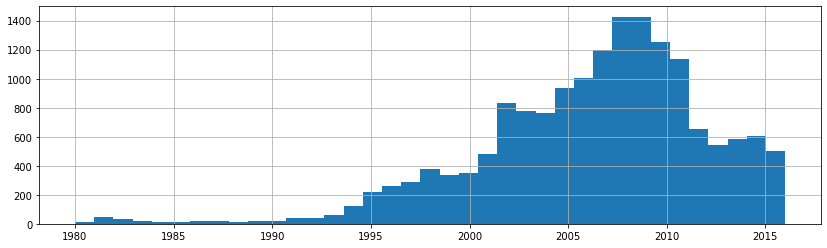

In [31]:
df['year_of_release'].hist(bins=(df['year_of_release'].max() - df['year_of_release'].min() + 1), figsize=(14, 4));

Количество игр распределено неравномерно по годам. Предполагаем, что в 80-е годы лидировали игры для игровых приставок, далее с конца 90-х количество игр росло в связи с распространением персональных компьютеров и их возможностей. С 2010 года спад количества игр можем объяснить развитием онлайн игр - вместо постоянных выпусков новых частей одной игры или новых игр  разработчики могут выпустить одну игру, периодически обновляя содержимое. С 2014 года наблюдается рост количества игр. Возможно, это связано с популярностью игровых консолей. 

Проверим предположения, изучив распределение для некоторых платформ.

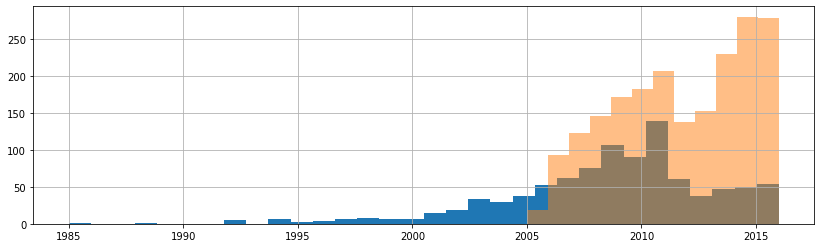

In [32]:
df_pc = df.query('platform == "PC"')
df_con = df.query('platform == "PS4" | platform == "X360" | platform == "XOne" | platform == "WiiU"')

df_pc['year_of_release'].hist(bins=(df_pc['year_of_release'].max() - df_pc['year_of_release'].min() + 1), figsize=(14, 4));
df_con['year_of_release'].hist(bins=(df_con['year_of_release'].max() - df_con['year_of_release'].min() + 1), figsize=(14, 4), alpha=0.5);

График распределения частично не подтвердил предположения. Игры для ПК распределены по всему диапазону с 1985 года, но количество игр всегда было низким, по сравнению с консольными играми. С 2013 года действительно наблюдается резкий рост консольных игр, в то время как рост количества игр для ПК не такой интенсивный. Проверить влияние онлайн игр на основании имеющихся данных нельзя.

График распределения и наши примерные предположения о развитии игровой индустрии говорят о том, что в заданный период проходило несколько фазовых переходов. Текущая фаза началась в 2013 году, поэтому для планирования кампании на 2017 год будем использовать данные с 2013 года. Подробнее изучим распределение по платформам далее.

### Распределение продаж по платформам

Ранее высказывали предположения по изменению количества игр по платформам. Рассмотрим продажи различных платформ по годам, построив сводные таблицы.

In [33]:
# Все продажи платформ по годам
platform_sales_pivot = pd.pivot_table(df,
                                     values='total_sales',
                                     index='platform',
                                     columns='year_of_release',
                                     aggfunc='sum')

Найдём платформы с наибольшими суммарными продажами:

In [34]:
platform_sales_total = df.groupby('platform').agg({'total_sales': 'sum'})

platform_sales_total.sort_values('total_sales', ascending=False).head(6)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58


In [35]:
#Сохраняем названия платформ. Для 6 наименований сделаем вручную
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [36]:
#Выводим продажи топовых платформ
top_platforms_year = platform_sales_pivot[platform_sales_pivot.index.isin(top_platforms)]
top_platforms_year

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


В данных за 1985 год на платформе DS замечена аномалия, изучим подробнее:

In [37]:
df.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Согласно данным сайта <a href="https://www.vgchartz.com/game/4399/strongest-tokyo-university-shogi-ds/" target="_blank">vgchartz.com</a>, такая игра действительно существует, но данные разнятся у различных источников, точная информация об этой части игры не была найдена, поэтому заменим год выпуска игры `Strongest Tokyo University Shogi DS` на NaN. Операцию проведём на этапе предобработки данных.

*Для корректного отображения несоответствия небоходимо закомментировать код в пункте 2.6.*

Построим распределение по годам.

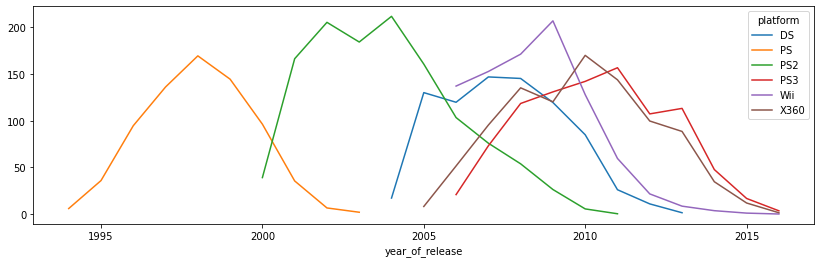

In [38]:
top_platforms_year_t = top_platforms_year.transpose()
top_platforms_year_t.plot(figsize=(14, 4));

Графики распределения продаж по годам похожи для разных платформах. Несмотря на то, что общий график распределения количества игр по годам был неоднородным, сильной зависимости от времени не наблюдается: разные платформы в своё время добиваются схожего успеха.

Рассмотрим время жизни шести топовых платформ:

In [39]:
top_platforms_year_t.count()

platform
DS      10
PS      10
PS2     12
PS3     11
Wii     11
X360    12
dtype: int64

Время жизни платформ также примерно одинаковое - от 10 до 12 лет. 

### Создание датафрейма актуальных данных

Ранее определили, что актуальным периодом является диапазон с 2013 года до текущего момента. Очистим имеющийся датафрейм от неактуальных данных.

Фильтруем годы:

In [40]:
df_cleared = df.query('year_of_release >= 2013')

df_cleared

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,WR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,WR,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16433,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,WR,0.01
16437,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,WR,0.01
16440,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,WR,0.01
16442,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,WR,0.01


Ранее на графике распределения продаж по платформам мы наблюдали вымирание многих платформ. Изучим динамику различных платформ за последние несколько лет.

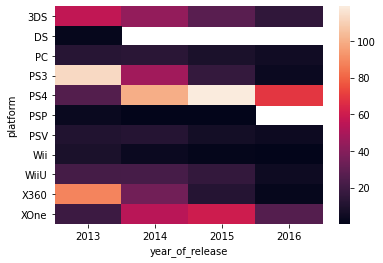

In [41]:
#Сведём таблицу продаж по годам, убрав вымершие до 2013 года платформы

act_platform_pivot = pd.pivot_table(df_cleared,
                                     values='total_sales',
                                     index='platform',
                                     columns='year_of_release',
                                     aggfunc='sum')

sns.heatmap(act_platform_pivot);

In [42]:
act_platform_pivot

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


На тепловой карте наглядно видно падение продаж на всех платформах. Из 11 платформ потенциально могут принести прибыль PS4 и XOne, так как продажи ещё не упали до уровня 2013 года. 

Ранее, в разделе 3.2 мы наблюдали, что платформа выходит на пик своей популярности в среднем через 4 года. В таблице мы видим резке снижение продаж по платформам PS4, XOne, WiiU и PC, что может быть вызвано неполнотой данных за 2016 год: датасет мог быть создан до того, как год закончился.

Платформы 3DS и WiiU ещё не устарели окончательно, но динамика негативная, даже сравнивая 2014 и 2015 год. Скорее всего, ожидается выпуск платформы нового поколение, в связи с чем на 2017 год ожидать гарантированную высокую долю продаж мы не можем, но, судя по динамике и зная среднее время жизни платформ, ещё год эти платформы будут актуальны.

Также в пункте 3.1 мы выявили, что PC является единственной платформой, которая никогда не устаревала. В следующем году можем ожидать относительно низкие продажи игр на ПК, но они гарантированно будут.

К сожалению, ни одна из представленных платформ не растёт по продажам*. Возможно, это частично связано с быстрорастущей популярностью мобильных игр за счёт увеличения мощностей мобильных устройств и, соответственно, появлением новых возможностей.

\**Сравнивая приращение продаж за 2013-2014 и 2014-2015 годы, за которые датасет уже полный, мы не можем гарантировать увеличение продаж в 2016, а тем более в 2017, даже на платформах PS4 и XOne*

Из очищенного датафрейма удалим неинтересные для прогноза платформы. Оставляем PS4 и XOne как самые молодые и крупные по продажам, PC, так как является "вечной" платформой, а также 3DS и WiiU, которые имеют хороший объёмы продаж и могут ещё быть популярными в 2017 году.

In [43]:
df_cleared = (df_cleared
              .query('platform == "PC" | platform == "PS4" | platform == "XOne" | platform == "3DS" | platform == "WiiU"')
              .reset_index(drop=True)
             )
df_cleared

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,WR,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,WR,14.60
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,WR,11.68
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
1241,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,WR,0.01
1242,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,<NA>,NaN,WR,0.01
1243,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,<NA>,NaN,M,0.01
1244,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,WR,0.01


### Изучение разброса глобальных продаж по платформам

Рассмотрим разброс глобальных продаж по каждой из выбранных платформ.

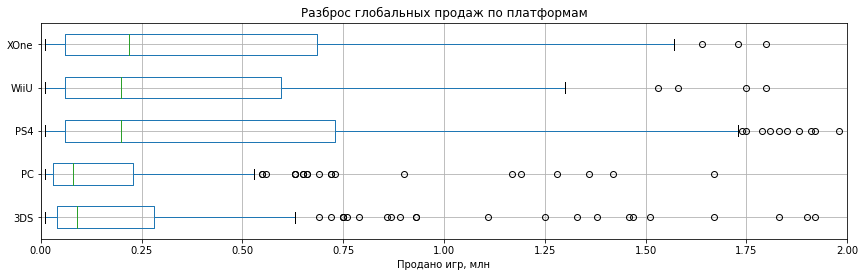

In [44]:
df_cleared.boxplot(column='total_sales', by='platform', vert=False, figsize=(14, 4))
plt.suptitle('')
plt.xlim([0, 2]) # слишком много выбросов, рассмотрим подробнее сами "ящики с усами"
plt.title('Разброс глобальных продаж по платформам')
plt.xlabel('Продано игр, млн');

In [45]:
df_cleared['platform'].value_counts()

PS4     392
3DS     303
XOne    247
PC      189
WiiU    115
Name: platform, dtype: int64

Медианные продажи игр на платформах XOne, WiiU и PS4 приблизительно одинаковые, но разброс у игр на PS4 гораздо выше, что связано с общим количеством игр на PS4. Количество игр на PC bи 3DS ниже, чем у остальной группы, и медианные значения между ними также похожи. Разброс аналогично связан с количеством игр.

На графике имеется большое количество выбросов. Датасет хранит в себе 11560 уникальных наименований, мир компьютерных игр слишком многообразный, но "нашумевших" игр, которые знают даже люди, не играющие в компьютерные игры, относительно немного. Предполагаем, что это именно они являются выбросами с большим количеством продаж. Проверим на примере PS4:

In [46]:
df_cleared.query('platform == "PS4" & total_sales > 3')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,WR,14.63
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
5,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,WR,7.98
6,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
7,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
10,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
13,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08
14,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76,6.1,T,5.64
16,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93,7.9,T,5.39


Проверим игры в районе медианных продаж:

In [47]:
df_cleared.query('platform == "PS4" & total_sales < 0.2 & total_sales > 0.17')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
527,Tony Hawk's Pro Skater 5,PS4,2015,Sports,0.09,0.08,0.00,0.03,32,1.5,T,0.20
532,Zombie Army Trilogy,PS4,2015,Shooter,0.05,0.12,0.00,0.03,62,6.8,WR,0.20
543,Bound By Flame,PS4,2014,Role-Playing,0.08,0.09,0.00,0.03,53,5.9,M,0.20
549,Dynasty Warriors 8: Empires,PS4,2014,Action,0.06,0.07,0.03,0.03,63,7.5,T,0.19
556,Singstar: Ultimate Party,PS4,2014,Misc,0.00,0.16,0.00,0.03,47,4.1,WR,0.19
562,Sword Art Online: Hollow Realization,PS4,2016,Role-Playing,0.06,0.02,0.10,0.02,69,7.7,T,0.20
563,Godzilla (2015),PS4,2014,Action,0.11,0.03,0.02,0.03,<NA>,NaN,WR,0.19
565,Saint Seiya: Soldiers' Soul,PS4,2015,Fighting,0.00,0.12,0.04,0.02,59,7.8,T,0.18
566,MotoGP 14,PS4,2014,Racing,0.04,0.11,0.00,0.03,73,6.4,E,0.18
572,Senran Kagura: Estival Versus,PS4,2015,Action,0.08,0.00,0.08,0.02,67,8.0,M,0.18


Автор работы, не имея PS4, субъективно может утверждать, что знает все игры из списка с продажами более 3 млн и не знаком ни с одним из наименований из списка с околомедианными продажами. Выбросы - это игры, ради которых пользователи покупают ту или иную платформу. Из таблицы мы также видим, что все игры из выбросов - либо новые части уже существующих успешных игр, либо продукт от лидера индустрии (например, Watch Dogs).

### Влияние отзывов на продажи

Рассмотрим влияние отзывов на продажи одной из топовых платформ, например, XOne.

In [48]:
df_cleared_xone = df_cleared.query('platform == "XOne"').reset_index(drop=True)

#### Зависимость от отзывов критиков

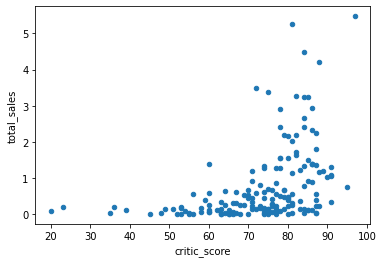

In [49]:
df_cleared_xone.plot(x='critic_score', y='total_sales',kind='scatter');

Корреляция между отзывами критиков и продажами:

In [50]:
df_cleared_xone['critic_score'] = df_cleared_xone['critic_score'].astype('float')
df_cleared_xone['total_sales'].corr(df_cleared_xone['critic_score'])

0.41699832800840175

**Вывод:**

Имеется слабая корреляция между оценками критиков и продажами игры. Такую низкую зависимость можно интерпретировать по-разному:
1. Пользователи прислушиваются к мнению критиков перед решением купить игру, поэтому игры с высокой оценкой покупают чаще;
2. Критики достаточно точно оценивают игры: присваивают высокие оценки успешным играм и низкие оценки непопулярным.

В пользу первой версии говорит отсутствие высоких продаж у игр с низкими оценками. В пользу второй - большое количество высоких оценок у игр с маленьким количеством продаж: критики высоко оценивают действительно качественные игры, но предназначенные для небольшой аудитории.

Слабость связи вызвана тем, что не все игры с высокой оценкой имеют высокий уровень продаж. Это говорит о том, что высокие продажи не являются следствием хороших оценок критиков.

In [51]:
#Код к комментарию

df_cleared['critic_score'] = df_cleared['critic_score'].astype('float')

# Наугад пишем случайные условия
df_cleared_ps = df_cleared.query('platform == "PS4"').reset_index(drop=True)
df_cleared_xone_gen = df_cleared.query('platform == "XOne" | genre == "Action" | genre == "Puzzle"').reset_index(drop=True)
df_cleared_wii = df_cleared.query('platform == "WiiU"').reset_index(drop=True)
df_cleared_wii_gen = df_cleared.query('platform == "WiiU" | genre == "Sports" | genre == "Strategy" | genre == "Simulation" | genre == "Shooter"').reset_index(drop=True)

# Выводим подозрительно похожие коэффициенты корреляции
print(df_cleared_ps['total_sales'].corr(df_cleared_ps['critic_score']))
print(df_cleared_xone_gen['total_sales'].corr(df_cleared_xone_gen['critic_score']))
print(df_cleared_wii['total_sales'].corr(df_cleared_wii['critic_score']))
print(df_cleared_wii_gen['total_sales'].corr(df_cleared_wii_gen['critic_score']))

0.406567902061781
0.3891528378570447
0.3764149065423912
0.3421834500443732


#### Зависимость от отзывов пользователей

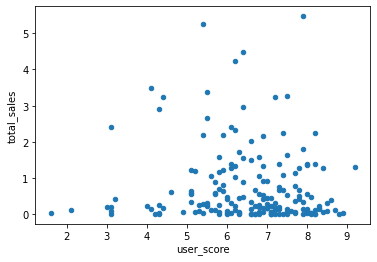

In [52]:
df_cleared_xone.plot(x='user_score', y='total_sales',kind='scatter');

In [53]:
df_cleared_xone['total_sales'].corr(df_cleared_xone['user_score'])

-0.06892505319711208

Рассмотрим один из выбросов - точку левее оценки 4, но выше 2 по оси ординат:

In [54]:
df_cleared_xone.query('user_score < 3.5 & total_sales > 1')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15,Call of Duty: Infinite Warfare,XOne,2016,Shooter,1.46,0.74,0.0,0.22,78.0,3.1,M,2.42


Для понимания высокого рассеяния данных по диаграмме изучим достоверность, а точнее причину расхождений: действительно ли эта игра получила крайне низкую оценку пользователей, но критики оценили гораздо выше?

На сайте <a href="https://www.metacritic.com/game/xbox-one/call-of-duty-infinite-warfare">metacritic.com</a> игра имеет оценку критиков 78 и пользовательский рейтинг 4.1. Из 18 отзывов критиков ни одного негативного, тогда как из 466 отзывов пользователей 259 - негативные. Изучив некоторые комментарии, в целом, ситуация следующая:
1. Критики утверждают, что это неплохое освежение франшизы COD, но высказали недоумение по поводу наличия зомби в игре;
2. Пользователи в большинстве крайне негативно отнеслись к тому, что некоторые моменты игры являются грубым копированием игры Black Ops 3, многие негодуют из-за наличия микротранзакций и ухода духа старых игр COD в сторону аркадности и научной фантастики.

Действительно, игры серии Call of Duty являются очень популярными, поэтому высокие продажи являются априорными.

Предполагаем, что в каждой игре имеются свои особенности и к каждой игре у пользователей будут отдельные критерии. Необходим более глубокий анализ различных выбросов, но для текущего исследования нас устраивает вывод о том, что оценки пользователей невозможно предсказать до выхода игры.

**Вывод:**

Корреляция между оценками пользователей и количеством продаж отсутствует, на диаграмме наблюдается отсутствие явных зависимостей.

Пользователи могут снизить оценку за те факторы, которые являются неосновными, но очень важными: нестабильность сервера для многопользовательской игры, стоимость внутриигровых вещей, схожесть сюжета с иными играми, завышенные ожидания и т.п.

В целом, пользователи и критики оценивают совершенно разные аспекты игры, которые индивидуальны для каждого продукта, поэтому оценки критиков и оценки пользователей сходятся редко.

### Сравнение продаж и отзывов с другими платформами

Проведём аналогичный анализ для игр на других платформах

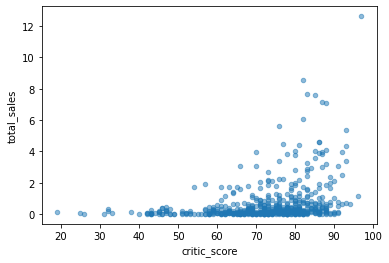

In [55]:
df_cleared.query('platform != "XOne"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5);

In [56]:
#Рассмотрим выброс в верхнем правом углу
df_cleared.query('critic_score > 95 & total_sales > 11')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Действительно, выброс не является ошибкой.

In [57]:
df_cleared['critic_score'] = df_cleared['critic_score'].astype('float')
df_cleared.query('platform != "XOne"')['total_sales'].corr(df_cleared['critic_score'])

0.3134792054405212

Аналогично для оценок пользователей:

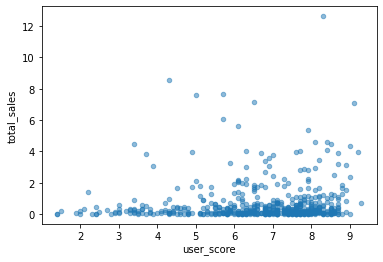

In [58]:
df_cleared.query('platform != "XOne"').plot(x='user_score', y='total_sales',kind='scatter', alpha=0.5);

In [59]:
df_cleared.query('platform != "XOne"')['total_sales'].corr(df_cleared['user_score'])

0.06884083276319593

**Вывод:**

1. Критики более стабильны в своих рецензиях и оценивают с примерно одинаковой точностью игры на всех платформах, но низкая корреляция и график говорят о том, что далеко не все игры с высокими оценками имеют высокую популярность среди пользователей;
2. Пользователи в своих оценках разнятся независимо от популярности игры. Корреляция незначительно выше у всех платформ, предполагаем, что причиной является большое количество игр с большим количеством продаж и высокой оценкой.

Для проверки корректности выбранного диапазона времени рассмотрим оценки и продажи старых игр.

In [60]:
df_old = df.query('year_of_release <= 2000').reset_index(drop=True)

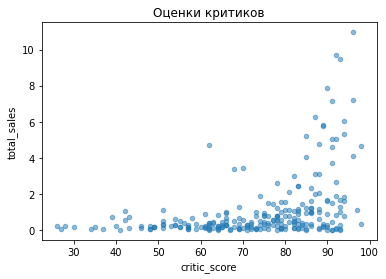

In [61]:
df_old.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('Оценки критиков');

In [62]:
df_old['critic_score'] = df_old['critic_score'].astype('float')
df_old['total_sales'].corr(df_old['critic_score'])

0.4092613138558337

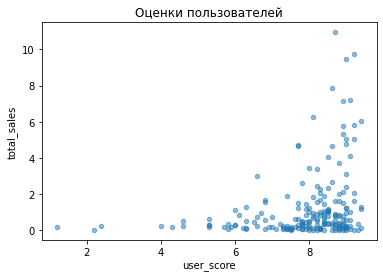

In [63]:
df_old.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('Оценки пользователей');

In [64]:
df_old['total_sales'].corr(df_old['user_score'])

0.2695557607704081

**Вывод:**

Критики всегда стабильно оценивают игры, но пользователи говорят, что "раньше было лучше".

### Изучение игр по жанрам

Рассмотрим количество игр и сумму их продаж по жанрам.

In [65]:
genres = (df_cleared
         .groupby('genre')
         .agg(игр=('name', 'count'), млн_продаж=('total_sales', 'sum')))

#Ради интереса посмотрим на среднее количество продаж на игру
genres['млн_копий_на_игру'] = genres['млн_продаж'] / genres['игр']

(genres
 .sort_values(by='млн_копий_на_игру', ascending=False)
 .style
 .highlight_max(color='coral', subset='игр')
 .highlight_min(color='yellowgreen', subset='игр')
 .highlight_max(color='coral', subset='млн_продаж')
 .highlight_min(color='yellowgreen', subset='млн_продаж')
)

,игр,млн_продаж,млн_копий_на_игру
genre,,,
Shooter,120,164.270000,1.368917
Sports,110,88.590000,0.805364
Role-Playing,150,113.710000,0.758067
Platform,49,33.750000,0.688776
Fighting,38,25.500000,0.671053
Racing,57,30.260000,0.530877
Action,443,189.460000,0.427675
Simulation,47,19.760000,0.420426
Misc,93,30.810000,0.331290


Самый распространённый жанр выпускаемых игр - Action, но среднее количество копий каждой игры в 3 раза больше у игр жанра Shooter.

Паззлы - самые редкие игры и имеют самое низкое количество проданных игр, но каждая игра, в среднем, продаётся хуже в стиле приключений и стратегий. 

Рассмотрим самый прибыльный жанр - Action.

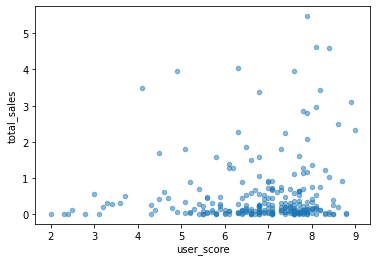

In [66]:
df_cleared.query('genre == "Action" & total_sales < 10').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5);

In [67]:
df_cleared.query('genre == "Action" & total_sales < 10')['total_sales'].corr(df_cleared['user_score'])

0.1145719086613161

Пользователи точнее оценивают игры жанра Action, но корреляция остаётся низкой. Рассмотрим корреляцию оценок пользователей и продаж у паззлов. Предполагаем, что в играх этого жанра не будет проблем с мультиплеером, микротранзакциями и сюжетом, и оценки пользователей будут точнее.

In [68]:
df_cleared.query('genre == "Puzzle"')['total_sales'].corr(df_cleared['user_score'])

0.5491692637828904

Предположение подтвердилось, корреляция выше у более редких игр, чего не скажешь об оценках, которые пользователи ставят шутерам, максимально влияя на общую статистику:

In [69]:
df_cleared.query('genre == "Shooter"')['total_sales'].corr(df_cleared['user_score'])

-0.019112784254802503

**Вывод:**

Жанры с высоким и низким рейтингом сильно выделяются:
1. Игр жанра Action, Shooter и ролевых производится и продаётся больше, чем остальных жанров вместе взятых;
2. Паззлы и стратегии - наиболее редкие игры. Предполагаем, что аудитория игр на мышление несравнимо ниже аудитории, которая ждёт от игр новых эмоций;
3. Чем популярнее жанр, тем выше ожидания у пользователей. Более сложные игры пользователи оценивают хаотичнее, чем простые паззлы, чем влияют на общую картину.

<a id="p4"></a>
## Шаг 4. Портрет пользователя каждого региона

Составим портреты пользователей разных регионов.

### Самые популярные платформы регионов NA, EU и JP

In [70]:
reg_sales = (df_cleared
         .groupby('platform')
         .agg(na_sales=('na_sales', 'sum'), eu_sales=('eu_sales', 'sum'), jp_sales=('jp_sales', 'sum'))
)
reg_sales

,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
PC,11.11,25.36,0.00
PS4,108.74,141.09,15.96
WiiU,29.21,19.85,10.88
XOne,93.12,51.59,0.34


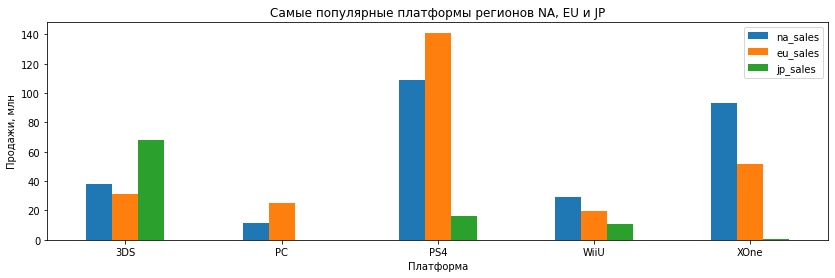

In [71]:
#Для наглядности построим диаграмму
reg_sales.plot(y=['na_sales', 'eu_sales', 'jp_sales'], kind='bar', figsize=(14, 4), rot=0)
plt.title('Самые популярные платформы регионов NA, EU и JP')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн');

Япония сильно выделяется на фоне Америки и Европы. Самыми продаваемыми играми в Японии являются продукты на платформах DS, PS, PS2, SNES, но все они устарели и не попали в актуальный датафрейм. Популярность в Японии сохраняется за портативной игровой системой 3DS. Компьютерный игры не продаются в Японии вовсе, либо отсутствуют официальные данные о продажах.

Второй по популярности платформой является PS4, что не удивительно, так как компания Sony - японская, а консоли PlayStation выросли от партнёрства с Nintendo, производителем платформы 3DS.

Учитывая население Японии и общее количество продаж, платформа 3DS является невероятно распространённой в данном регионе.
<br>
<br>
<br>
Общее количество продаж в Америке и Европе схоже, что делает анализ более корректным.
Платформа XOne популярнее в Америке, так как производителем является американская компания, в то время, как PS4 популярнее в Европе. Предполагаем, что часть "сомневающихся" в выборе геймеров в Америке приняли решение в пользу приставки Xbox: разница в количестве проданных игр очень близка.

Игры на ПК в Америке в 2,3 раза менее популярны, чем в Европе. К сожалению, смелых предположений по данному отличию высказать трудно, но имеется гипотеза о том, что игровые консоли более доступны в Америке, поэтому геймеры предпочитают игры на платформах, которые предназначены исключительно для игр, тогда как в Европе для пользователей приемлемы и игры на ПК.
<br>
<br>
<br>
Игры на платформе WiiU в Америке имеют столько же продаж, сколько в Европе и Японии. В Японии популярность объясняется общей распространённостью консолей от Nintendo. В Америке распространение WiiU можем объяснить так же, как и ранее непопулярность компьютеров - в Америке консоль WiiU доступнее, чем в Европе.
<br>
<br>
<br>
*// По крайней мере, мне, европейцу, не понять назначение приставок Wii U и не понять целесообразности иных консолей при наличии ПК, поэтому выводы могут быть субъективными.*

### Самые популярные жанры регионов NA, EU и JP

Создадим для каждого региона топ-5 жанров.

In [72]:
reg_sales_genres = (df_cleared
         .groupby('genre')
         .agg(na_sales=('na_sales', 'sum'), eu_sales=('eu_sales', 'sum'), jp_sales=('jp_sales', 'sum'))
)
#Выделяем жанры, чтобы они не были индексами
reg_sales_genres['genre_name'] = reg_sales_genres.index

#Создаём новые индексы
top = ['Top-1', 'Top-2', 'Top-3', 'Top-4', 'Top-5']

#Создаём топы
na_sales_genres = reg_sales_genres[['genre_name', 'na_sales']].sort_values(by='na_sales', ascending=False).head(5)
eu_sales_genres = reg_sales_genres[['genre_name', 'eu_sales']].sort_values(by='eu_sales', ascending=False).head(5)
jp_sales_genres = reg_sales_genres[['genre_name', 'jp_sales']].sort_values(by='jp_sales', ascending=False).head(5)

na_sales_genres['top'] = top
eu_sales_genres['top'] = top
jp_sales_genres['top'] = top

#Объединяем топы
res = (na_sales_genres
       .merge(eu_sales_genres, on='top', suffixes=['_na','_eu'])
       .merge(jp_sales_genres, on='top')
       .rename(columns = {'genre_name': 'genre_name_jp'})
       .drop('top', 1)
      )

res.index = top
res

,genre_name_na,na_sales,genre_name_eu,eu_sales,genre_name_jp,jp_sales
Top-1,Shooter,74.85,Action,71.98,Role-Playing,38.00
Top-2,Action,72.43,Shooter,64.34,Action,24.00
Top-3,Sports,36.74,Sports,37.91,Misc,6.23
Top-4,Role-Playing,36.35,Role-Playing,30.96,Platform,4.71
Top-5,Platform,14.02,Racing,15.17,Fighting,4.68


Игры жанров Shooter и Action - самые популярные в Европе и Северной Америке. Эти жанры часто очень похожи, поэтому в целом можно утверждать, что предпочтения большинства игроков схожи, так же как и в выборе спортивных и ролевых игр - продажи примерно одинаковые.

На пятом месте в Европе и Северной Америка стоят платформеры и гонки. Эти игры в обоих регионах находятся на 5 и 6 месте, с незначительными отличиями в объёмах продаж.

Предпочтения пользователей из Японии сильно отличаются от предпочтений игроков других регионов. На первом месте находятся ролевые игры. Возможно, это связано с двумя вещами:
1. Ролевые игры распространены на платформе 3DS;
2. Азия является одним из крупнейших производителем различных ролевых игр.

Первое предположение проверим:

In [73]:
df_cleared.query('platform == "3DS"')['genre'].value_counts().head(5)

Action          116
Role-Playing     62
Misc             32
Adventure        27
Simulation       15
Name: genre, dtype: int64

Гипотезу подтверждаем, RPG и игры жанра Action наиболее распространены на платформу 3DS.

В пользу второй версии говорит <a href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%BE%D0%BB%D0%B5%D0%B2%D0%B0%D1%8F_%D0%B8%D0%B3%D1%80%D0%B0#2010-%D0%B5_%D0%B3%D0%BE%D0%B4%D1%8B" target="_blank">общая информация</a> о ролевых игр - японские разработчики известны своими продуктами, в частности, в исследуемые годы, играми Dragon's Dogma, Ni no Kuni, Final Fantasy, Dark_Souls и т.д. Особенно в последний период пользуются популярностью игра из серий Pokemon и Monster Hunter.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [74]:
rating_sales_pivot = (df_cleared
                      .pivot_table(index='rating',
                                   values=['na_sales', 'eu_sales', 'jp_sales'],
                                   aggfunc='sum')
                      .sort_values('na_sales', ascending=False)
                     )

rating_sales_pivot['rating'] = rating_sales_pivot.index
rating_sales_pivot

,eu_sales,jp_sales,na_sales,rating
rating,,,,
M,93.37,6.75,95.62,M
WR,62.05,61.22,67.40,WR
E,57.00,13.20,51.84,E
T,31.38,8.44,33.67,T
E10+,25.05,5.38,31.85,E10+


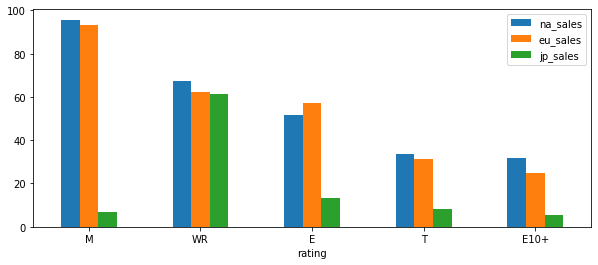

In [75]:
rating_sales_pivot.plot(x='rating', y=['na_sales', 'eu_sales', 'jp_sales'], kind='bar', rot=0, figsize=(10,4));

В Европе и Северной Америке игры с рейтингом М (17+, со сценами насилия) лидирую, тогда как такие игры в Японии занимают только 3-е место по популярности. В Японии лидируют игры с рейтингом E, для всех. Возможно, это связано с тем, что шутеры и экшн-игры менее распространены в Японии, чем ролевые игры "для всех" - как мы помним, в этом регионе лидируют Покемоны.

Влияет ли рейтинг на продажи, сказать сложно, так как в первую очередь игроки обращают внимание на саму игру и жанр, во вторую - на совместимость с платформой, и, может быть, далее на рейтинг игры. Несмотря на это, можно сделать общий вывод, что игры с захватывающими сценами популярны в Европе и Америке, но в Японии игры жанра Action популярнее с рейтингом E.

Ранее мы заполнили пропуски в столбце рейтингов значением "WR". Так как рейтинг ESRB работает на территории США и Канады, в большинстве случаев он не качается игр из Японии. Проверим:

In [76]:
df_cleared.query('rating == "WR" & jp_sales != 0').sort_values(by='jp_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,WR,14.60
42,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,WR,3.44
47,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,0.09,0.00,3.18,0.01,NaN,NaN,WR,3.28
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,WR,11.68
46,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,WR,3.32
65,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,0.00,0.00,2.68,0.00,NaN,NaN,WR,2.68
8,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,WR,7.55
74,Yokai Watch Busters,3DS,2015,Action,0.00,0.00,2.29,0.00,NaN,NaN,WR,2.29
11,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,WR,7.14
18,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,WR,5.22


В таблице имеется большое количество японских игр, но также имеются игры, которые выпускаются и в Северной америке, родине ESRB:

In [77]:
df_cleared.query('rating == "WR" & na_sales != 0').sort_values(by='na_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,WR,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,WR,14.60
9,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,WR,7.39
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,WR,11.68
8,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,WR,7.55
5,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,WR,7.98
11,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,WR,7.14
19,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,WR,4.87
39,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,WR,3.66
20,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,NaN,NaN,WR,4.72


Call of Duty: Black Ops 3 имеет рейтинг "M", но в полученных данных значение было пропущено. Рассмотрим причины:

In [78]:
df_cleared.query('rating == "WR"')['genre'].value_counts()

Action          177
Role-Playing     81
Misc             52
Adventure        48
Simulation       22
Strategy         21
Sports           18
Shooter          17
Fighting         16
Racing           13
Platform          6
Puzzle            5
Name: genre, dtype: int64

In [79]:
df_cleared.query('rating == "WR"')['platform'].value_counts()

3DS     199
PS4     137
XOne     61
PC       49
WiiU     30
Name: platform, dtype: int64

Ролевые, экшн-игры и игры на платформе 3DS - предпочтения Японии, но в играх без рейтинга имеется имеется большое количества игр для PS4, несвойственные этому региону. В датасете нет точного ответа на найденное несоответствие, но посмотрев поверхностно на общую картину игр без рейтинга, предполагаем, что их объединяет то, что все эти игры - онлайн. Действительно, в <a href="https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board#%D0%9E%D0%BD%D0%BB%D0%B0%D0%B9%D0%BD-%D1%80%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3" target="_blank">источнике</a> указано, что рейтинг не присуждается онлайн играм, так как содержимое изменяется пользователями, а не разработчиком. По этой причине столбики продаж игр без рейтинга имеют отличающийся от остальных характер и распределены по всем регионам равномерно.

<a id="p5"></a>
## Шаг 5. Проверка гипотез

### Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC

Проверим гипотезу о равенстве средних пользовательских рейтингов платформ XOne и PC.

Считаем, что выборки независимые, поэтому используем метод проверки гипотезы о равенстве средних двух генеральных совокупностей по взятым из них выборкам `scipy.stats.ttest_ind`.

- **Нулевая гипотеза:** средний пользовательский рейтинг на платформе XOne и на платформе PC одинаковый.
- **Альтернативная гипотеза:** средний пользовательский рейтинг на платформах XOne и PC различается.

In [80]:
sample_1_1 = df_cleared.query('platform == "XOne"')['user_score'].dropna()
sample_1_2 = df_cleared.query('platform == "PC"')['user_score'].dropna()

print('Длина выборок:', len(sample_1_1),'и', len(sample_1_2))

Длина выборок: 182 и 155


В выборках имеется достаточное количество значений, поэтому нормальное распределение не является обязательным условием. 

Так как выборки разного размера, `equal_var=False`

In [81]:
results = st.ttest_ind(sample_1_1, sample_1_2, equal_var=False)

alpha = .01

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759702913383088
Не получилось отвергнуть нулевую гипотезу


<AxesSubplot:>

<AxesSubplot:>

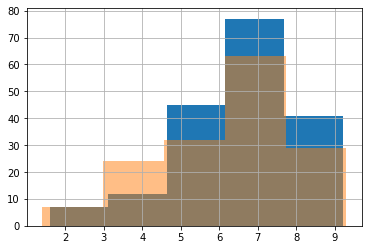

In [82]:
# Посмотрим на график распределения
display(sample_1_1.hist(bins=5));
display(sample_1_2.hist(bins=5, alpha=0.5));

**Вывод:**

Гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC отвергнуть не удалось: с вероятностью 14,76% мы получим предполагаемый результат, что является достаточным уровнем. Ранее мы выявляли, что пользователи действительно примерно одинаково оценивают игры на схожих платформах; судя по корреляциям, оценки могут значительно отличаться между жанрами.

### Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports

Коэффициенты корреляции оценок-продаж различных жанров значительно различались. Проверим, действительно ли пользователи по-разному оценивают различные жанры игр?

- **Нулевая гипотеза:** средний пользовательский рейтинг жанров Action и Sports одинаковый.
- **Альтернативная гипотеза:** средний пользовательский рейтинг жанров Action и Sports различается.

In [83]:
sample_2_1 = df_cleared.query('genre == "Action"')['user_score'].dropna()
sample_2_2 = df_cleared.query('genre == "Sports"')['user_score'].dropna()

print('Длина выборок:', len(sample_2_1),'и', len(sample_2_2))

Длина выборок: 254 и 96


В выборках достаточно значений для проведения анализа. Считаем выборки независимыми, используем метод проверки гипотезы о равенстве средних двух генеральных совокупностей по взятым из них выборкам, `scipy.stats.ttest_ind`.

Выборки сильно различаются по размеру, `equal_var=False`.

In [84]:
results = st.ttest_ind(sample_2_1, sample_2_2, equal_var=False)

alpha = .01

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.954450246051381e-11
Отвергаем нулевую гипотезу


<AxesSubplot:>

<AxesSubplot:>

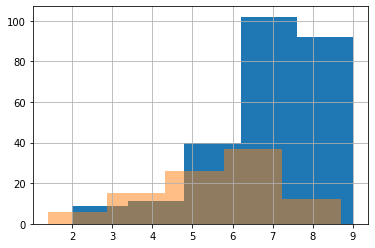

In [85]:
#Посмотрим на графики для наглядности
display(sample_2_1.hist(bins=5));
display(sample_2_2.hist(bins=5, alpha=0.5));

**Промежуточный вывод:**

Гипотеза о равенстве не подтвердилась, принимаем альтернативную гипотезу, из чего следует, что наше предположение о различной оценке пользователями игр разных жанров верно.

В пункте 4.2 мы выяснили, что игры жанра Action популярны во всех регионах, а спортивные игры - в Европе и Северной Америке. Возможно, статистика из Японии нарушает общий результат. Повторим проверку гипотезы, исключив игры, оцениваемые в Японии, из исследования.

In [86]:
#Также удалим все остальные продажи, так как в них могут быть включены азиатские продажи, схожие с японскими.
#Без исключения other_sales результат мало отличается от первой проверки гипотезы
sample_3_1 = df_cleared.query('genre == "Action" & jp_sales == 0 & other_sales == 0')['user_score'].dropna()
sample_3_2 = df_cleared.query('genre == "Sports" & jp_sales == 0 & other_sales == 0')['user_score'].dropna()

print('Длина выборок:', len(sample_3_1),'и', len(sample_3_2))

Длина выборок: 64 и 17


**В анализе принимают участие игры исключительно американского и европейского рынка.**
- **Нулевая гипотеза:** средний пользовательский рейтинг жанров Action и Sports одинаковый.
- **Альтернативная гипотеза:** средний пользовательский рейтинг жанров Action и Sports различается.

In [87]:
results = st.ttest_ind(sample_3_1, sample_3_2, equal_var=False)

alpha = .01

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0024997440269158423
Отвергаем нулевую гипотезу


**Вывод:**

Гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports отвергаем, принимаем альтернативную гипотезу. Игроки по-разному оценивают игры различных жанров, независимо от их предпочтений в различных регионах.

<a id="p6"></a>
## Вывод

**В ходе исследования была проведена следующая работа:**
1. Изучены различные периоды времени и изменение количества игр в разные годы;
2. Проанализированы изменения популярности различных игровых платформ по времени, выведен средний срок жизни платформы;
3. Очищены данные за актуальную фазу развития игр;
4. Выбраны потенциально прибыльные платформы, изучены глобальные продажи игр потенциально прибыльных платформ;
5. Изучены зависимости продаж от оценок пользователей и оценок критиков;
6. Изучено общее распределение игр по жанрам, выявлены прибыльные жанры;
7. Составлен портрет пользователя каждого региона:
    - Изучены различия в продажах игр для разных платформ;
    - Выявлены наиболее популярные жанры в каждом регионе;
    - Проанализировано влияние рейтинга ESRB на продажи в разных регионах.
8. Проверена гипотеза о равенстве средних рейтингах пользователей игр на платформах Xbox One и PC;
9. Проверена гипотеза о различных средних пользовательских рейтингах игр жанров экшн и спортивных игр.

**Результаты исследования:**

Для планирования кампании на 2017 год необходимо учесть следующие закономерности:
1. В 2017 году будут наиболее популярны игры на платформах PlayStation 4 и Xbox One. Необходимо также уделить внимание играм на платформе WiiU, в частности на американском рынке, и играм на платформе Nintendo 3DS, особенно в Японии. Игры для персональных компьютеров считаем наиболее стабильными, поэтому они должны быть включены в план продаж, но в меньших объёмах.
2. В Северной Америке и Европе наибольшей популярностью будут пользоваться игры жанров Action и Shooter.
3. Пользователи готовы покупать игры популярных жанров даже при низких оценках других игроков. Пользовательские рейтинги случайны и не зависят от платформы.
3. В Северной Америке и Европе стоит особое внимание уделить играм с рейтингом M и E.
4. Игры без рейтинга - онлайн игры, пользуются популярностью во всём мире. Необходимо сфокусироваться на играх с многопользовательским режимом на платформе PS4.
5. Спортивные игры также популярны в Америке и Европе. Такие игры имеют небольшой ассортимент, но они продаются в большом объёме.
6. В Японии лучшие продажи у ролевых игр с рейтингом E, но также популярны и экшн-игры с рейтингом M, хоть и в меньшей степени.